<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Cory!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b>  </div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.
    
Overall, well done! I can see that a lot of effort has been put in. Your project already looks really good, and you've achieved impressive results.

You’ll find specific feedback in the notebook in the ‘Comments’ (`Reviewer's comment v1`) sections, which will help enhance your project even further:
    
And of course, if you have any questions along the way, don't hesitate to reach out to your tutor for clarification.
</div>

Now! It's time to look at things through our python eyes. Here we will be able to take the data that we have previously sorted through SQL and be able to plot and graph the data to better visualize different preferences and when the opportune time is to try to break into the Chicago market.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df1 = pd.read_csv("/datasets/project_sql_result_01.csv")
df2 = pd.read_csv("/datasets/project_sql_result_04.csv")
df3 = pd.read_csv("/datasets/project_sql_result_07.csv")

display(df1.head(10))
display(df2.head(10))
display(df3.head(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [3]:
df2["average_trips"] = df2["average_trips"].astype(int)

display(df2.head(10))

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
The `average_trips` column is currently a float, but it should be an integer since it represents the average number of trips. Could you please adjust its data type?

In [4]:
missing_values = df1.isnull().sum()

print(missing_values)

company_name    0
trips_amount    0
dtype: int64


In [5]:
missing_values2 = df2.isnull().sum()

print(missing_values2)

dropoff_location_name    0
average_trips            0
dtype: int64


In [6]:
duplicates_df1 = df1[df1.duplicated()].sum()

print(duplicates_df1)

company_name    0.0
trips_amount    0.0
dtype: float64


In [7]:
duplicates_df2 = df2[df2.duplicated()].sum()

print(duplicates_df2)

dropoff_location_name    0.0
average_trips            0.0
dtype: float64


In [8]:
missing_values3 = df3.isnull().sum()

print(missing_values3)

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
This is a great way to start any analysis because it helps you understand what the data looks like and whether there are any missing values.

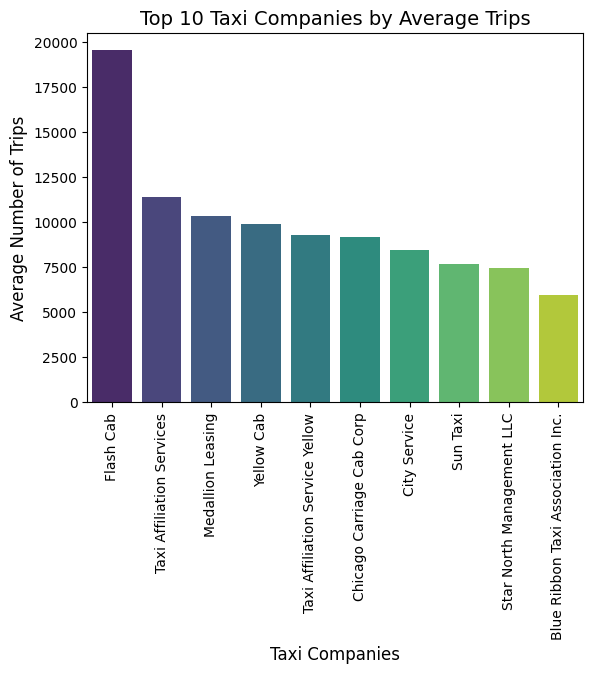

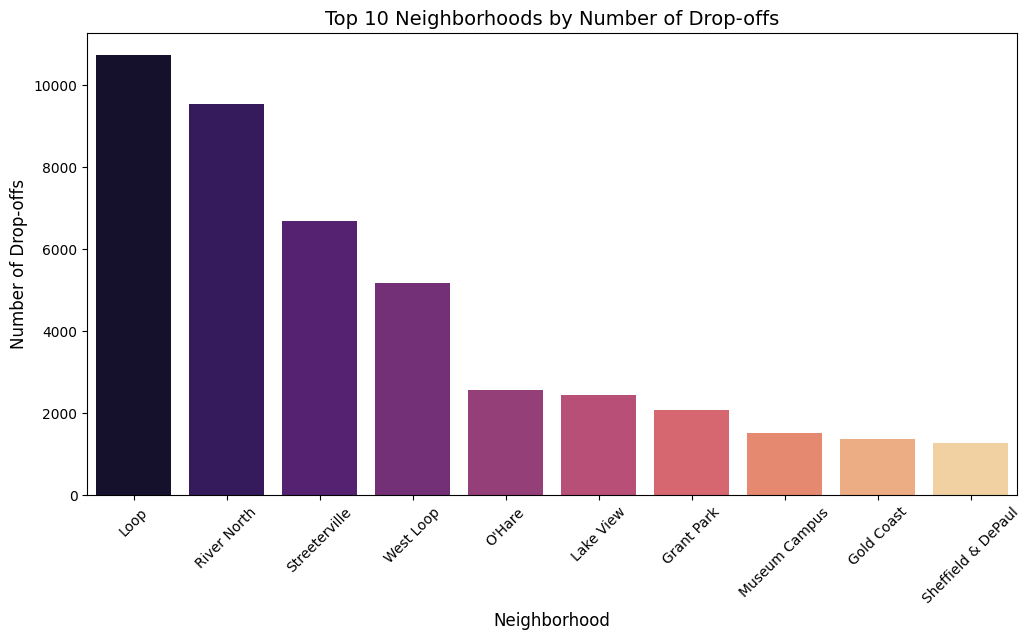

In [9]:
top_companies = df1.groupby("company_name")["trips_amount"].mean().reset_index()
top_companies = top_companies.sort_values(by="trips_amount", ascending=False).head(10)
sns.barplot(x="company_name", y="trips_amount", data=top_companies, palette="viridis")

plt.xlabel("Taxi Companies", fontsize=12)
plt.ylabel("Average Number of Trips", fontsize=12)
plt.title("Top 10 Taxi Companies by Average Trips", fontsize=14)
plt.xticks(rotation=90)  
plt.show()

top_neighborhoods = df2.groupby("dropoff_location_name")["average_trips"].sum().nlargest(10).reset_index()
top_neighborhoods.columns = ["Neighborhood", "Number of Drop-offs"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Neighborhood", y="Number of Drop-offs", data=top_neighborhoods, palette="magma")
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Drop-offs", fontsize=12)
plt.title("Top 10 Neighborhoods by Number of Drop-offs", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In the table above we see that Flash Cab is killing it in the amount of trips it is doing vs all of the other competition. We also see that out of the top 10 neighborhoods the top four hold the market for drop offs! There are prefecerences here that we can see in the taxi cab service used due to Flach Cab doing almost double all other services.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Well done! Everything is correct here. 

In [11]:
df3['z_score'] = np.abs(stats.zscore(df3['duration_seconds']))

outliers_z = df3[df3['z_score'] > 3]
print(f"Outliers detected using Z-score:\n{outliers_z}")

df3.drop(columns=['z_score'], inplace=True)

Outliers detected using Z-score:
                start_ts weather_conditions  duration_seconds   z_score
79   2017-11-11 15:00:00               Good            4800.0  3.547349
276  2017-11-18 12:00:00                Bad            4980.0  3.781388
354  2017-11-25 11:00:00               Good            7440.0  6.979929
583  2017-11-11 16:00:00               Good            4980.0  3.781388
619  2017-11-25 14:00:00               Good            6420.0  5.653705
646  2017-11-11 13:00:00               Good            4380.0  3.001256


In [13]:
df3['z_score'] = np.abs(stats.zscore(df3['duration_seconds']))

df3_cleaned = df3[df3['z_score'] <= 3].drop(columns=['z_score'])

print(f"Original size: {len(df3)}, Cleaned size: {len(df3_cleaned)}")

Original size: 1068, Cleaned size: 1062


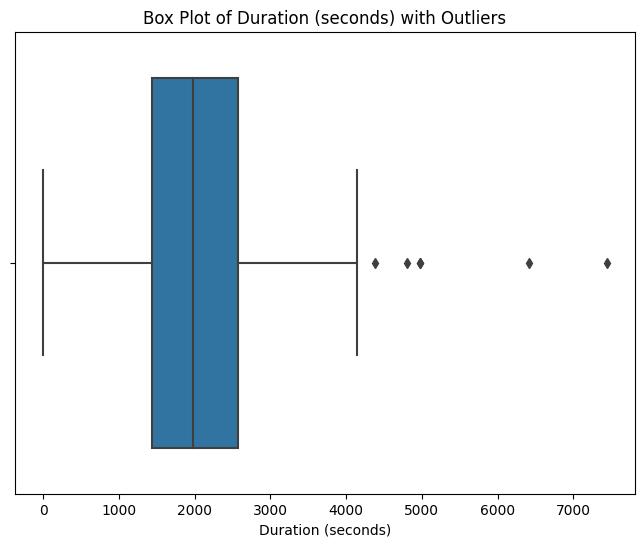

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df3["duration_seconds"])
plt.title("Box Plot of Duration (seconds) with Outliers")
plt.xlabel("Duration (seconds)")
plt.show()

Hypothesis: Does the average duration of rides change on rainy Saturdays?

 - Null Hypothesis = The average ride duration on rainy Saturdays is equal to the average ride duration on non-rainy Saturdays.
 
 - Alternative Hypothesis = The average ride duration on rainy Saturdays is different from the average ride duration on non-rainy Saturdays.

In [14]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'], errors='coerce')

rainy_saturdays = df3[df3['weather_conditions'].str.contains("Bad", case=False, na=False)]
non_rainy_saturdays = df3[~df3['weather_conditions'].str.contains("Bad", case=False, na=False)]

rainy_saturdays = rainy_saturdays.dropna(subset=['duration_seconds'])
non_rainy_saturdays = non_rainy_saturdays.dropna(subset=['duration_seconds'])

if len(rainy_saturdays) <= 2 or len(non_rainy_saturdays) <= 2:
    print("Not enough data to perform the test.")
else:
    t_statistic, p_value = stats.ttest_ind(
        rainy_saturdays['duration_seconds'],
        non_rainy_saturdays['duration_seconds'],
        equal_var=False
    )

   
    alpha = 0.05

   
    if p_value < alpha:
        conclusion = "Reject the null hypothesis: The average duration of rides changes on rainy Saturdays."
    else:
        conclusion = "Fail to reject the null hypothesis: There is no significant evidence that the average duration of rides changes on rainy Saturdays."

    print(f"T-statistic: {t_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(conclusion)

T-statistic: 7.19
P-value: 0.0000
Reject the null hypothesis: The average duration of rides changes on rainy Saturdays.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Could you please make a quick check of the dataframe: descriptive statistics, missing values, duplicates, outliers. 
    
Outliers can significantly affect the results of a two-sample t-test . Since the t-test compares the means of two groups, outliers can distort the mean and variance estimates, leading to unreliable test statistics and p-values. This distortion can result in an increased Type I error rate (incorrectly rejecting the null hypothesis) or reduced statistical power (failing to detect a true effect).
    
Here you could create a boxplot to identify outliers in `duration_seconds`. Make a decision how to proceed with them.  

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box:
    
    H0:
    
    H1:

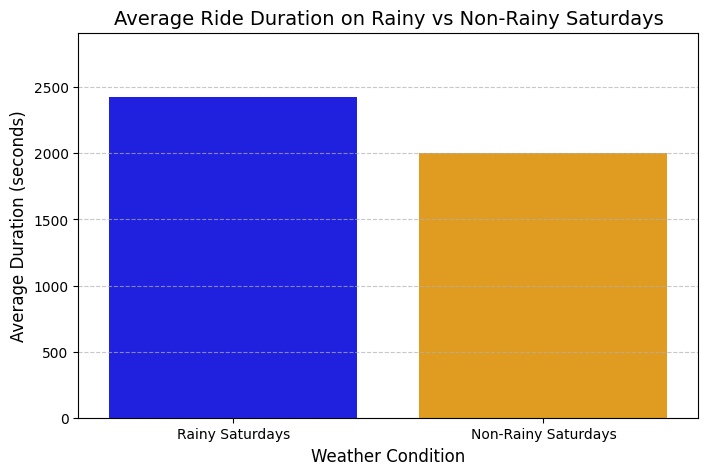

In [16]:
avg_duration_rainy = rainy_saturdays['duration_seconds'].mean()
avg_duration_non_rainy = non_rainy_saturdays['duration_seconds'].mean()

categories = ['Rainy Saturdays', 'Non-Rainy Saturdays']
averages = [avg_duration_rainy, avg_duration_non_rainy]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=averages, palette=['blue', 'orange'])

plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Duration (seconds)", fontsize=12)
plt.title("Average Ride Duration on Rainy vs Non-Rainy Saturdays", fontsize=14)
plt.ylim(0, max(averages) * 1.2)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

To help interpert the hypothesis from above in a more understandable way of seeing it, Rainy Saturdays only increase their drive time from Loop to O'Hare International Air Port by 7 minutes. This is a significant amount of time increase for busy individuals trying to make it to the airport! The reason we need to reject the null hypothesis is due to the fact that again 7 minutes is a higher deviance in the time on non rainy saturdays. 

In closing, There is plenty of room for us to grow here in the Chicago Market!! This being said we will need to do a few things and focus on them to be at the top of our game. 1. See if there are any alternate routes that will give us the edge on our competitors for getting customers where they need to be quicker while still maintaining safety! 2. Focus on the neighborhoods that are in the top four for drop off locations, not only will this help us get our name out there but word will spread about us due to the tactics stated above! Finally, we have built our business on customer care and reliability for our customers in the past, so let's continue to use that to help us grow in the Chicago Market!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Overall, your conclusions are insightful and actionable, providing Zuber with a comprehensive roadmap to optimize operations and enhance its competitive edge in Chicago. Great work!